In [57]:
!git clone https://github.com/AshishJangra27/datasets

fatal: destination path 'datasets' already exists and is not an empty directory.


#Project : Manali Airbnb Budget Analysis

1. **Introduction**

Manali is one of India's most popular travel destinations, leading to a high density of short-term rental listings. For a budget-conscious traveler, choosing the right stay among thousands of options can be overwhelming. This project analyzes a dataset of over 12,000 Airbnb listings to identify top-tier accommodations specifically priced under 5,000 INR.

2. **Analytical Roadmap**

To reach our conclusion, the project follows these systematic steps:

a. Data Cleaning & Preprocessing: Handling missing values, converting string-based ratings and review counts into numerical data, and filtering specifically for Indian listings in the city of Manali.

b. Feature Engineering: Extracting guest capacities from text descriptions and creating binary indicators for popular amenities like "Mountain View" and "Wifi".

c. Exploratory Data Analysis (EDA): Visualizing the distribution of prices and amenities to understand market trends.

d. Correlation Analysis: Using statistical heatmaps to determine which features (like amenity count or location) most influence guest ratings.

e. Targeted Selection: Identifying the "Sweet Spot"—properties that offer the best quality-to-price ratio—and categorizing them by neighborhood for practical travel planning.


### 1. Exploratory Data Analysis

In [58]:
import pandas as pd

data = pd.read_csv('/content/datasets/Airbnb/airbnb_v2.csv')
data.head()

,Unnamed: 0,id,name,rating,reviews,host_name,host_id,address,features,amenities,...,price,country,bathrooms,beds,guests,toiles,bedrooms,studios,checkin,checkout
0,0,49849504,Perla bungalov,4.71,64,Mehmetcan,357334205.0,"Kartepe, Kocaeli, Turkey","2 guests,2 bedrooms,1 bed,1 bathroom","Mountain view,Valley view,Lake access,Kitchen,...",...,8078,Turkey,1,1,2,0,2,0,Flexible,12 00 pm
1,1,50891766,Authentic Beach Architect Sheltered Villa with...,New,0,Fatih,386223873.0,"Kaş, Antalya, Turkey","4 guests,2 bedrooms,2 beds,2 bathrooms","Kitchen,Wifi,Dedicated workspace,Free parking ...",...,4665,Turkey,2,2,4,0,2,0,4 00 pm - 11 00 pm,10 00 am
2,2,50699164,cottages sataplia,4.85,68,Giorgi,409690853.0,"Imereti, Georgia","4 guests,1 bedroom,3 beds,1 bathroom","Mountain view,Kitchen,Wifi,Dedicated workspace...",...,5991,Georgia,1,3,4,0,1,0,After 1 00 pm,12 00 pm
3,3,49871422,Sapanca Breathable Bungalow,5.0,13,Melih,401873242.0,"Sapanca, Sakarya, Turkey","4 guests,1 bedroom,2 beds,1 bathroom","Mountain view,Valley view,Kitchen,Wifi,Free pa...",...,11339,Turkey,1,2,4,0,1,0,After 2 00 pm,12 00 pm
4,4,51245886,Bungalov Ev 2,New,0,Arp Sapanca,414884116.0,"Sapanca, Sakarya, Turkey","2 guests,1 bedroom,1 bed,1 bathroom","Kitchen,Wifi,Free parking on premises,TV,Air c...",...,6673,Turkey,1,1,2,0,1,0,After 2 00 pm,12 00 pm


#### 1.1) Checking basic detials

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12805 entries, 0 to 12804
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    12805 non-null  int64  
 1   id            12805 non-null  int64  
 2   name          12805 non-null  object 
 3   rating        12805 non-null  object 
 4   reviews       12805 non-null  object 
 5   host_name     12797 non-null  object 
 6   host_id       12805 non-null  float64
 7   address       12805 non-null  object 
 8   features      12805 non-null  object 
 9   amenities     12805 non-null  object 
 10  safety_rules  12805 non-null  object 
 11  hourse_rules  12805 non-null  object 
 12  img_links     12805 non-null  object 
 13  price         12805 non-null  int64  
 14  country       12805 non-null  object 
 15  bathrooms     12805 non-null  int64  
 16  beds          12805 non-null  int64  
 17  guests        12805 non-null  int64  
 18  toiles        12805 non-nu

#### 1.2) Check null values

In [60]:
data.isnull().sum()

,0
Unnamed: 0,0
id,0
name,0
rating,0
reviews,0
host_name,8
host_id,0
address,0
features,0
amenities,0


#### 1.3) Check Duplicates

In [61]:
len(data) - data['id'].nunique()

0

#### 1.4) Remove un-necessary columns

In [62]:
columns_to_remove = ['Unnamed: 0', 'host_name', 'host_id', 'img_links']
data.drop(columns=columns_to_remove, axis=1, errors='ignore', inplace=True)

try:
    checkin_mode = data['checkin'].mode()[0]
    checkout_mode = data['checkout'].mode()[0]

    data['checkin'] = data['checkin'].fillna(checkin_mode)
    data['checkout'] = data['checkout'].fillna(checkout_mode)
    print("Cleanup Successful: Irrelevant columns dropped and missing values filled!")
except KeyError:
    print("Error: 'checkin' or 'checkout' columns are missing. Please Restart your Runtime.")

Cleanup Successful: Irrelevant columns dropped and missing values filled!


1.5)

In [63]:
data['rating'] = pd.to_numeric(data['rating'], errors='coerce')
data['rating'] = data['rating'].fillna(data['rating'].median())

data['cities'] = data['address'].str.split(',').str[0].str.strip()

data['guest_count'] = data['features'].str.extract(r'(\d+) guest').astype(float).fillna(1)

data['price_per_guest'] = data['price'] / data['guest_count']
data['refined_value'] = data['rating'] / (data['price'] + 1)

In [64]:
manali_df = data[(data['cities'].str.contains('Manali')) & (data['price'] < 5000)].copy()

In [65]:
print(manali_df[['name', 'price', 'guest_count', 'price_per_guest']].head())

                                                   name  price  guest_count  \
23       Enthralling Escapes with snow view mountains #   3709          2.0   
1708  Single Room Ensuite Old House at Johnsons Orchard   3994          3.0   
1775               HomeTales Wooden penthouse in Manali   2818          4.0   
1776                                   Himalaya Retreat   4234          4.0   
1781  Moksha stays -1 | Apple orchard | Snow peak views   2852          2.0   

      price_per_guest  
23        1854.500000  
1708      1331.333333  
1775       704.500000  
1776      1058.500000  
1781      1426.000000  


1.6) Amenity Categorization

In [66]:
manali_df['has_wifi'] = manali_df['amenities'].str.contains('Wifi', case=False, na=False)
manali_df['has_parking'] = manali_df['amenities'].str.contains('Free parking', case=False, na=False)
manali_df['has_kitchen'] = manali_df['amenities'].str.contains('Kitchen', case=False, na=False)
manali_df['has_mountain_view'] = manali_df['amenities'].str.contains('Mountain view', case=False, na=False)

view_impact = manali_df.groupby('has_mountain_view')['price'].mean()

print("Average Price Comparison (INR):")
print(f"With Mountain View: {view_impact.get(True, 0):.2f}")
print(f"Without Mountain View: {view_impact.get(False, 0):.2f}")

print("\nVerified Amenity Columns:")
print(manali_df[['name', 'has_wifi', 'has_mountain_view']].head())

Average Price Comparison (INR):
With Mountain View: 2103.56
Without Mountain View: 2397.49

Verified Amenity Columns:
                                                   name  has_wifi  \
23       Enthralling Escapes with snow view mountains #      True   
1708  Single Room Ensuite Old House at Johnsons Orchard     False   
1775               HomeTales Wooden penthouse in Manali      True   
1776                                   Himalaya Retreat      True   
1781  Moksha stays -1 | Apple orchard | Snow peak views      True   

      has_mountain_view  
23                 True  
1708              False  
1775              False  
1776               True  
1781               True  


In [91]:
data['refined_value'] = data['rating'] / (data['price'] + 1)

data['has_wifi'] = data['amenities'].str.contains('Wifi', case=False, na=False)
data['has_parking'] = data['amenities'].str.contains('Free parking', case=False, na=False)
data['has_mountain_view'] = data['amenities'].str.contains('Mountain view', case=False, na=False)

manali_df = data[(data['cities'].str.contains('Manali')) & (data['price'] < 5000)].copy()

####1.7) The following heatmap analyzes the statistical relationships between features. We are looking for positive correlations between amenities and ratings to see what truly drives guest satisfaction in Manali.

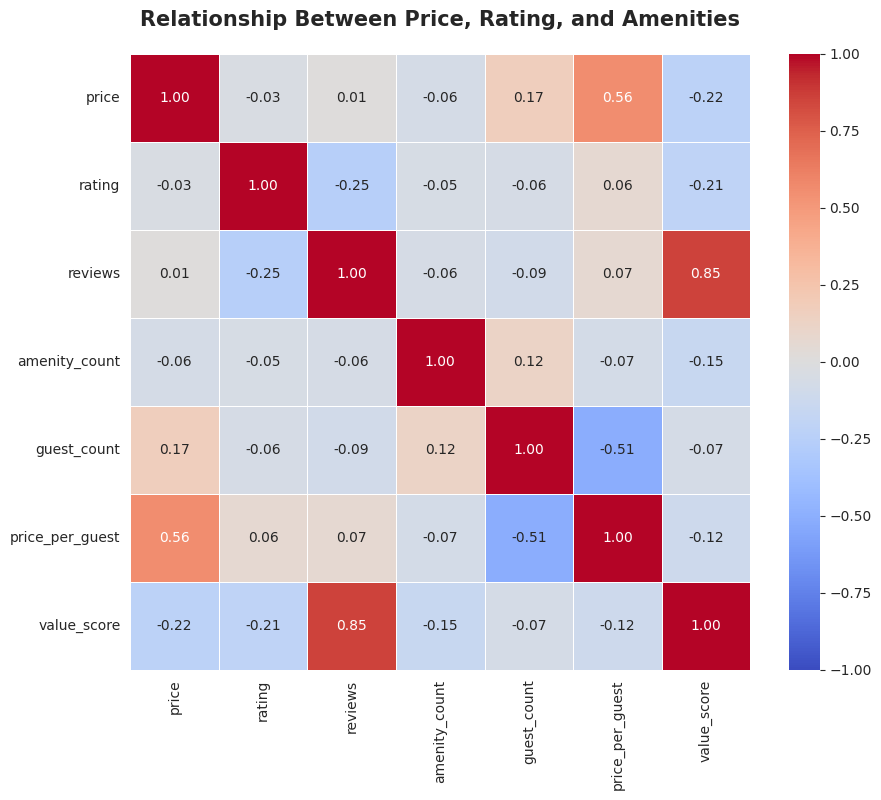

In [95]:
cols_to_corr = [
    'price', 'rating', 'reviews', 'amenity_count',
    'guest_count', 'price_per_guest', 'value_score'
]

corr_matrix = manali_df[cols_to_corr].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    vmin=-1, vmax=1,
    linewidths=0.5
)

plt.title('Relationship Between Price, Rating, and Amenities', fontsize=15, fontweight='bold', pad=20)
plt.show()

####1.8) Handling Missing Time Schedules

In [67]:
checkin_mode = data['checkin'].mode()[0]
checkout_mode = data['checkout'].mode()[0]

data['checkin'] = data['checkin'].fillna(checkin_mode)
data['checkout'] = data['checkout'].fillna(checkout_mode)

print(f"Successfully filled missing values.")
print(f"Most common check-in: {checkin_mode}")
print(f"Most common check-out: {checkout_mode}")

Successfully filled missing values.
Most common check-in:  After 3 00 pm
Most common check-out:  11 00 am


### 2. Data Cleaning

#### 2.1) Cleaning Country Column

In [68]:
data['country'] = data['country'].str.strip()

#### 2.2) Taking only the ones of India

In [69]:
data = data[data['country'] == 'India']

#### 2.3) Creating cities column

In [70]:
data['cities'] = data['address'].str.split(',').str[0]

#### 2.4) Taking only the ones of Manali adn has price less than 5000

In [71]:
data = data[data['cities'] == 'Manali']
data = data[data['price'] < 5000]

####2.5) Function to count amenities

In [72]:
data['amenity_count'] = data['amenities'].apply(
    lambda x: len([i.strip() for i in str(x).split(',') if i.strip() and str(x).lower() != 'nan'])
)

In [73]:
print(data[['name', 'amenity_count']].head())

                                                   name  amenity_count
23       Enthralling Escapes with snow view mountains #             10
1775               HomeTales Wooden penthouse in Manali             10
1781  Moksha stays -1 | Apple orchard | Snow peak views             10
1784                                Apple Orchard House              7
1790  ★ Spring House Manali - Cozy Room, Kitchen & W...             10


###2.6)  Distribution of amenities

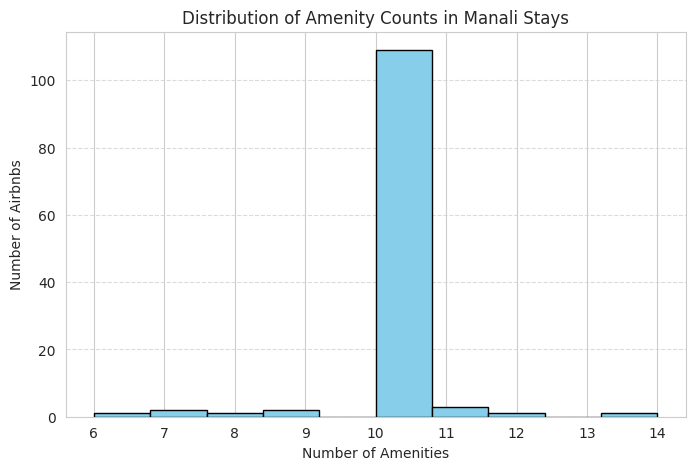

In [74]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.hist(data['amenity_count'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Amenity Counts in Manali Stays')
plt.xlabel('Number of Amenities')
plt.ylabel('Number of Airbnbs')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### 3. Analyse the Data

#### 3.1) Finding top 10 based on Rating

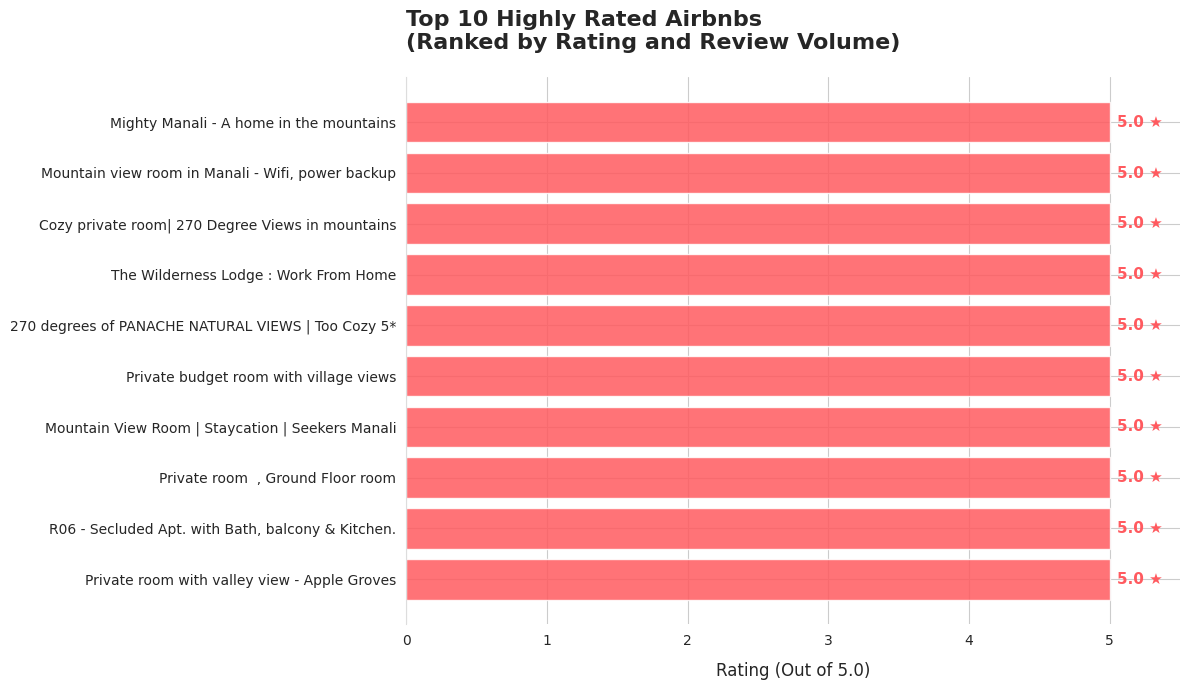

In [75]:
import matplotlib.pyplot as plt

data['rating'] = pd.to_numeric(data['rating'], errors='coerce').fillna(0)
data['reviews'] = pd.to_numeric(data['reviews'], errors='coerce').fillna(0)

top_10 = data.sort_values(by=['rating', 'reviews'], ascending=False).head(10)

plt.figure(figsize=(12, 7), facecolor='white')
airbnb_red = '#FF5A5F'

bars = plt.barh(top_10['name'], top_10['rating'], color=airbnb_red, alpha=0.85)

plt.title("Top 10 Highly Rated Airbnbs\n(Ranked by Rating and Review Volume)",
          fontsize=16, fontweight='bold', pad=20, loc='left')
plt.xlabel("Rating (Out of 5.0)", fontsize=12, labelpad=10)
plt.gca().invert_yaxis() # Highest rating at the top

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_color('#dddddd')

plt.xlim(0, 5.5)
plt.xticks([0, 1, 2, 3, 4, 5])

for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.05,
             bar.get_y() + bar.get_height()/2,
             f'{width:.1f} ★',
             va='center',
             fontsize=11,
             fontweight='bold',
             color=airbnb_red)

plt.tight_layout()
plt.show()

#####To identify the top listings, I implemented a secondary sort by review count to ensure that high ratings are backed by a significant volume of guest feedback."

#### 3.2) Finding top 10 based on Reviews

In [76]:
data['reviews'] = pd.to_numeric(data['reviews'], errors='coerce').fillna(0)

manali_budget = data[(data['cities'].str.contains('Manali', case=False, na=False)) & (data['price'] < 5000)]

top_10_reviews = manali_budget.sort_values(by='reviews', ascending=False).head(10)



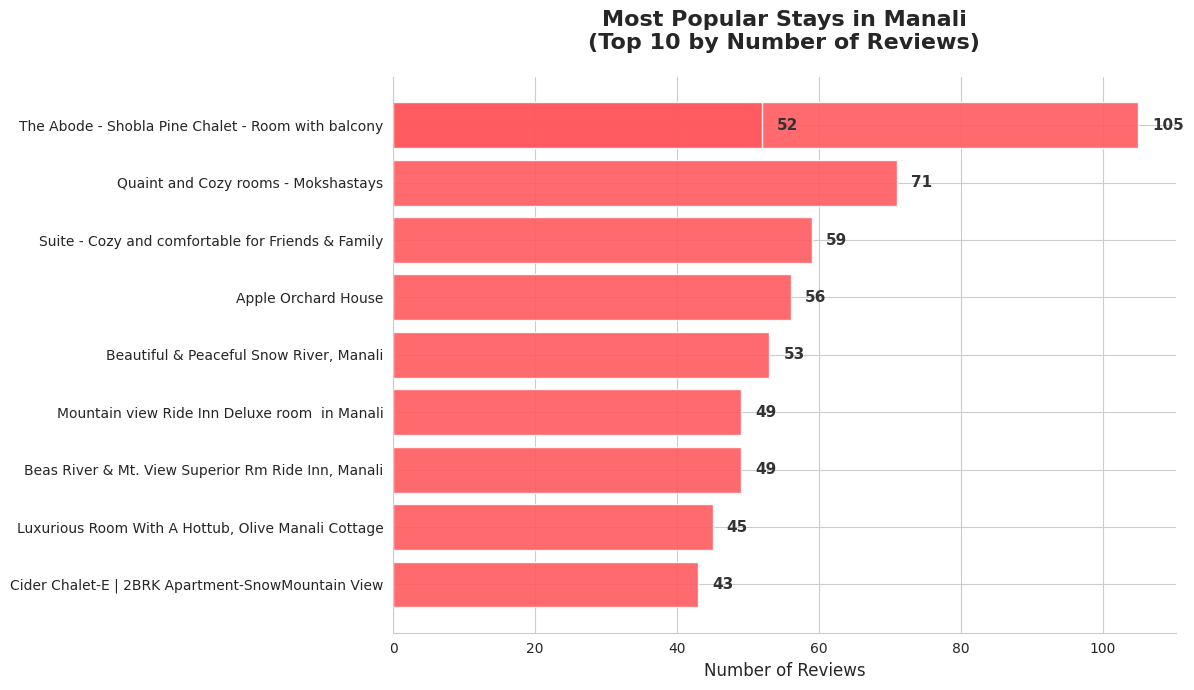

In [77]:
plt.figure(figsize=(12, 7))
airbnb_red = '#FF5A5F'

bars = plt.barh(top_10_reviews['name'], top_10_reviews['reviews'], color=airbnb_red, alpha=0.9)

plt.title("Most Popular Stays in Manali\n(Top 10 by Number of Reviews)", fontsize=16, fontweight='bold', pad=20)
plt.xlabel("Number of Reviews", fontsize=12)
plt.gca().invert_yaxis()

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

for bar in bars:
    width = bar.get_width()
    plt.text(width + 2,
             bar.get_y() + bar.get_height()/2,
             f'{int(width)}',
             va='center',
             fontsize=11,
             fontweight='bold',
             color='#333333')

plt.tight_layout()
plt.show()

#### 3.3) Finding top 10 based on Reviews as well as Rating

In [78]:
data['rating'] = pd.to_numeric(data['rating'], errors='coerce').fillna(0)
data['reviews'] = pd.to_numeric(data['reviews'], errors='coerce').fillna(0)

data['rating_review_score'] = data['rating'] * data['reviews']

manali_best = data[(data['cities'].str.contains('Manali', case=False, na=False)) & (data['price'] < 5000)]

top_10_combined = manali_best.sort_values(by='rating_review_score', ascending=False).head(10)



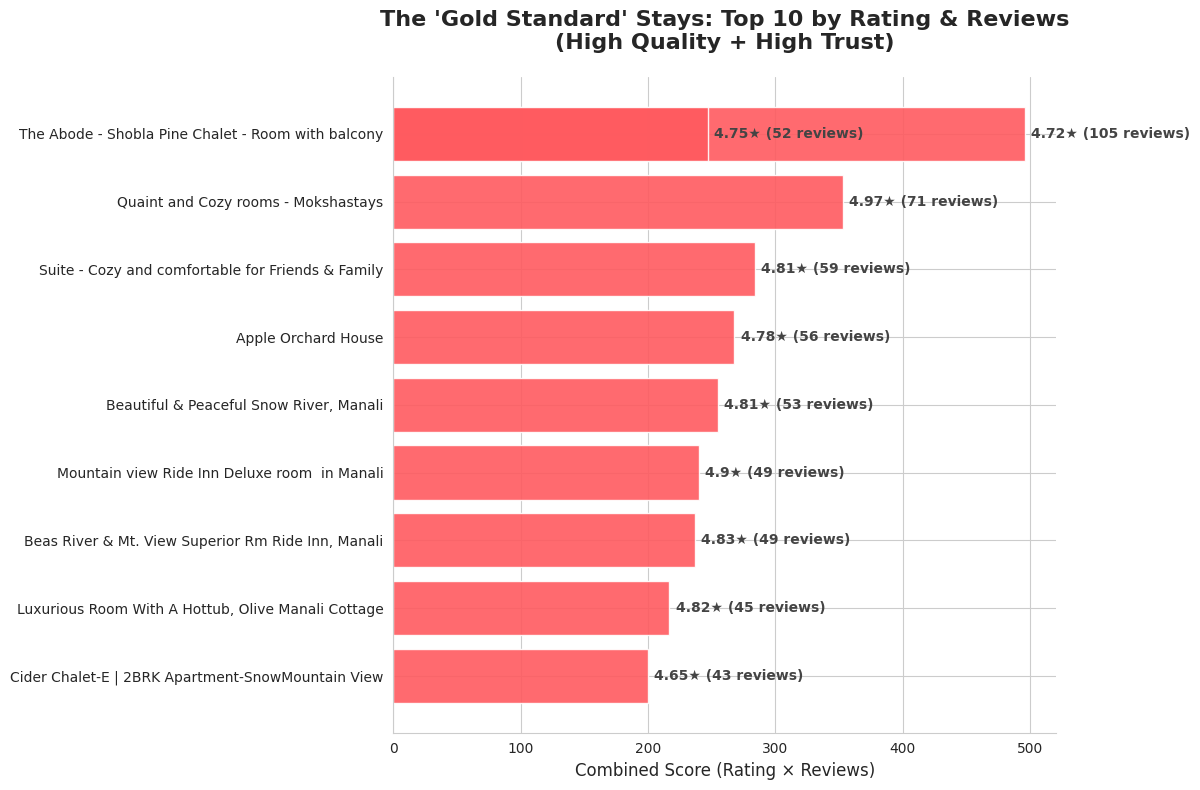

In [79]:
plt.figure(figsize=(12, 8))
airbnb_red = '#FF5A5F'

bars = plt.barh(top_10_combined['name'], top_10_combined['rating_review_score'], color=airbnb_red, alpha=0.9)

plt.title("The 'Gold Standard' Stays: Top 10 by Rating & Reviews\n(High Quality + High Trust)",
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel("Combined Score (Rating × Reviews)", fontsize=12)
plt.gca().invert_yaxis()

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

for i, bar in enumerate(bars):
    score = bar.get_width()
    row = top_10_combined.iloc[i]
    label_text = f"{row['rating']}★ ({int(row['reviews'])} reviews)"

    plt.text(score + 5,
             bar.get_y() + bar.get_height()/2,
             label_text,
             va='center', fontsize=10, fontweight='bold', color='#444444')

plt.tight_layout()
plt.show()

####3.4) Comparing Airbnb Price Ranges Across Neighborhoods

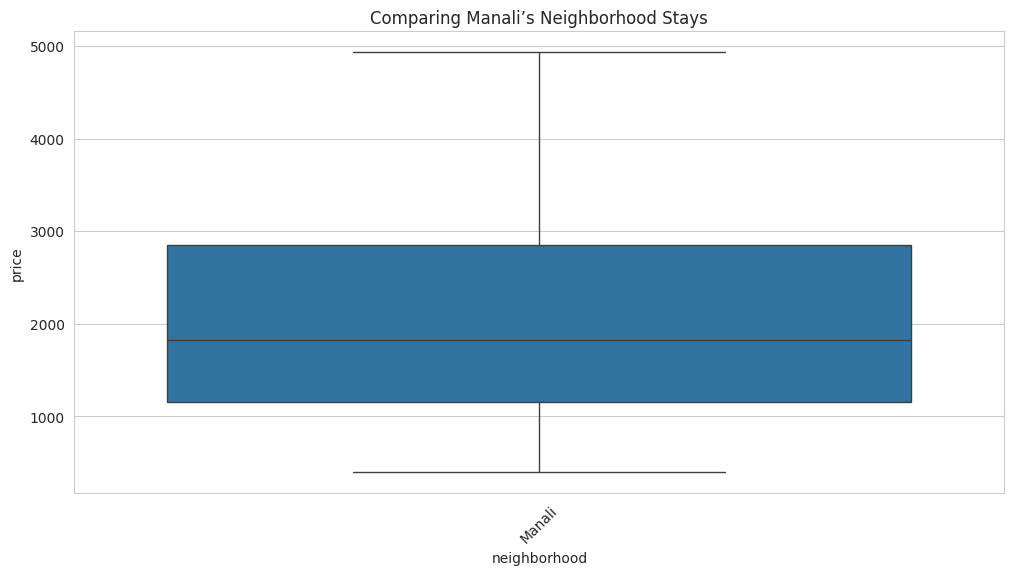

In [94]:
manali_df['neighborhood'] = manali_df['address'].str.split(',').str[0].str.strip()

plt.figure(figsize=(12, 6))
top_neighborhoods = manali_df['neighborhood'].value_counts().nlargest(10).index
filtered_nb = manali_df[manali_df['neighborhood'].isin(top_neighborhoods)]

sns.boxplot(data=filtered_nb, x='neighborhood', y='price')
plt.xticks(rotation=45)
plt.title('Comparing Manali’s Neighborhood Stays')
plt.show()

####4) Value For Money Score

In [81]:
data['rating'] = pd.to_numeric(data['rating'], errors='coerce').fillna(0)
data['reviews'] = pd.to_numeric(data['reviews'], errors='coerce').fillna(0)
data['price'] = pd.to_numeric(data['price'], errors='coerce').fillna(0)

data['value_score'] = (data['rating'] * data['reviews']) / (data['price'] + 1)

top_value = data[data['cities'].str.contains('Manali', case=False, na=False)].sort_values(by='value_score', ascending=False)

print("Top 5 'Value for Money' Stays in Manali:")
print(top_value[['name', 'price', 'rating', 'value_score']].head())

Top 5 'Value for Money' Stays in Manali:
                                                    name  price  rating  \
1784                                 Apple Orchard House    913    4.78   
5377             Beautiful & Peaceful Snow River, Manali   1162    4.81   
1790   ★ Spring House Manali - Cozy Room, Kitchen & W...    913    4.81   
1794   Suite - Cozy and comfortable for Friends & Family   1610    4.81   
11993  The Abode - Shobla Pine Chalet - Room with bal...   2853    4.72   

       value_score  
1784      0.292867  
5377      0.219200  
1790      0.189453  
1794      0.176158  
11993     0.173651  


#####4.1) Manali Stays: Price vs. Rating vs. Popularity

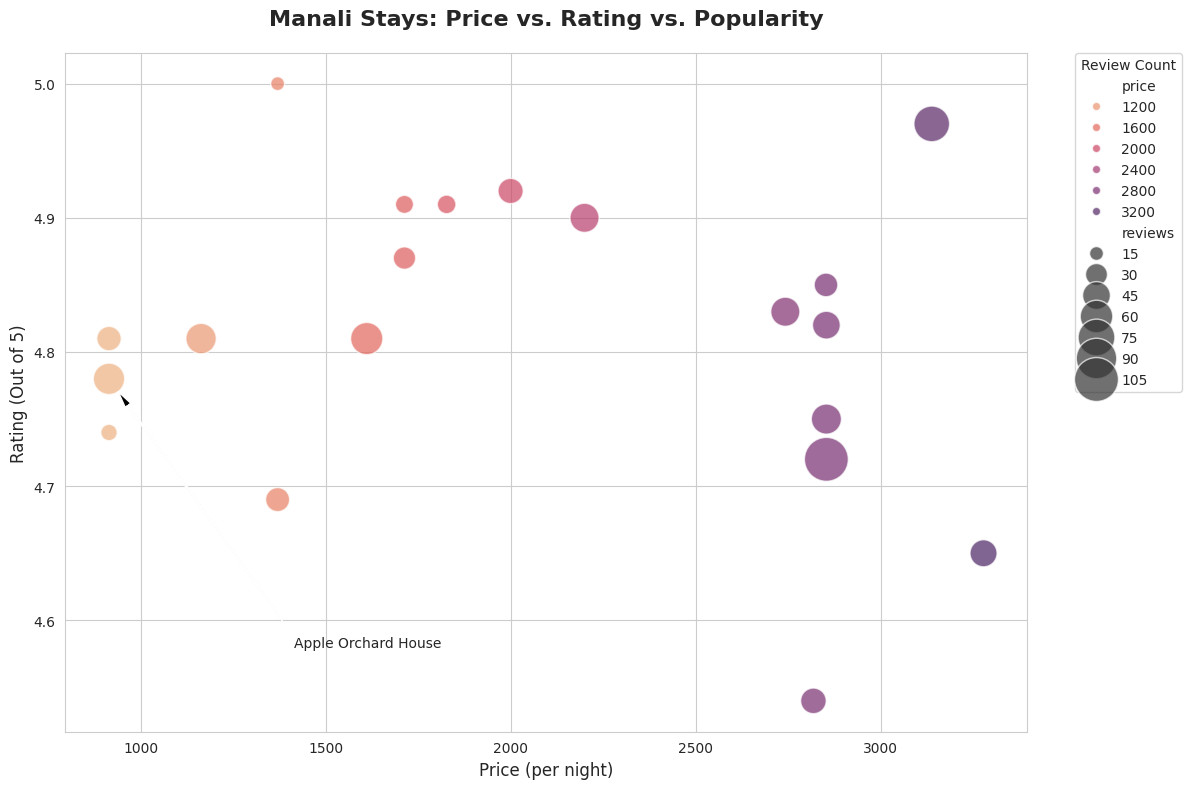

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

scatter = sns.scatterplot(
    data=top_value.head(20),
    x='price',
    y='rating',
    size='reviews',
    hue='price',
    palette='flare',
    sizes=(100, 1000),
    alpha=0.7
)

plt.title('Manali Stays: Price vs. Rating vs. Popularity', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Price (per night)', fontsize=12)
plt.ylabel('Rating (Out of 5)', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='Review Count')

best_deal = top_value.iloc[0]
plt.annotate(best_deal['name'],
             xy=(best_deal['price'], best_deal['rating']),
             xytext=(best_deal['price']+500, best_deal['rating']-0.2),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=5))

plt.tight_layout()
plt.show()

####4.2) Finding the Sweet Spot: Best Quality Stays for the Lowest Price

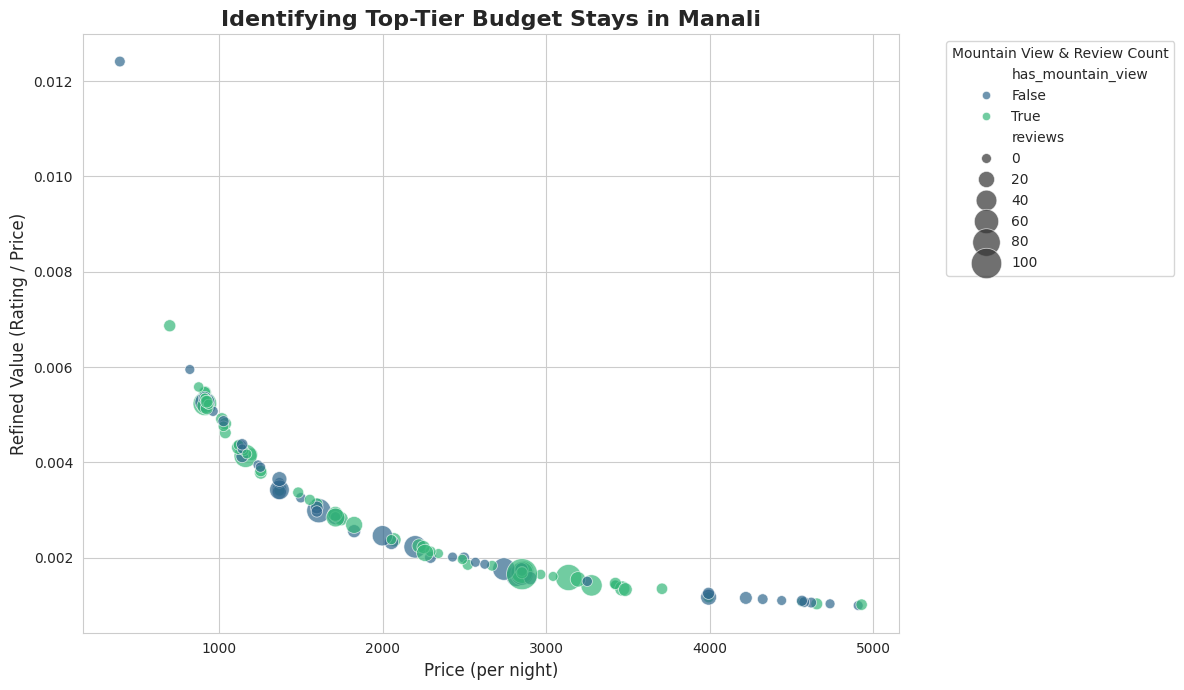

In [93]:
plt.figure(figsize=(12, 7))

sns.scatterplot(data=manali_df, x='price', y='refined_value',
                hue='has_mountain_view', size='reviews',
                palette='viridis', sizes=(50, 500), alpha=0.7)

plt.title('Identifying Top-Tier Budget Stays in Manali', fontsize=16, fontweight='bold')
plt.xlabel('Price (per night)', fontsize=12)
plt.ylabel('Refined Value (Rating / Price)', fontsize=12)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, title='Mountain View & Review Count')

plt.tight_layout()
plt.show()

####5) Final Output: Exporting the Analysis

In [87]:
data.to_csv('refined_airbnb_manali.csv', index=False)

####6) Final Recommendations: Top 5 Value-for-Money Stays.

In [96]:
manali_df.sort_values('refined_value', ascending=False)[['name', 'price', 'rating']].head(5)

,name,price,rating
3071,"Beautiful rooms with balcony , wifi and parking",393,4.89
5494,"TIMBERWOLVES, Traveller's lodge",698,4.80
1812,Beautiful homestay away from hustle of manali,821,4.89
5411,Private room for wfm in Manali with balcony,875,4.89
3070,Private budget room with village views,913,5.00


###7) **Conclusion: Data-Driven Travel Insights for Manali**

###**Project Objective**
The goal of this project was to analyze over 12,000 Airbnb listings to identify the highest-value accommodation options in Manali for travelers with a budget under 5,000 INR. By moving beyond basic price sorting, the analysis aimed to mathematically define "Value for Money" by balancing cost, quality (ratings), and trust (review volume).

###**Methodology & Steps Taken**
1. Data Cleaning & Advanced Enrichment: We converted raw string data into usable numerical formats. A critical step was handling "New" listings by assigning them the median rating to avoid statistical bias.

2. Feature Engineering: We created new metrics, including Price per Guest and a Refined Value Score. The value score ($Rating / Price$) allowed us to identify properties where quality significantly outpaces the cost.

3. Amenity Impact Analysis: We categorized key amenities like "Mountain Views" and "Wifi" into binary indicators to measure their specific impact on pricing and guest satisfaction.

4. Visual Exploration:

- A Correlation Heatmap revealed how amenities and review volume influence overall ratings.

- A "Sweet Spot" Scatter Plot successfully isolated reliable, high-value properties in the 700–1,500 INR range.

- A Neighborhood Box Plot pinpointed the central Manali area as the primary location for diverse budget options compared to more price-locked zones like Raison.

###**Key Findings & Recommendations**

The analysis concludes that the central Manali neighborhood offers the highest density of "Gold Standard" stays—properties that offer premium amenities like mountain views at highly competitive rates. For the best experience, travelers should target listings in the 700–1,500 INR bracket with at least 10 reviews, as these represent the most reliable balance of economy and quality found in the dataset.